In [10]:
import numpy as np
from collections import defaultdict

# Define mapping for card values and suits
card_value_map = {'A': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 
                  'T': 10, 'J': 11, 'Q': 12, 'K': 13}
suit_map = {'h': 1, 's': 2, 'd': 3, 'c': 4}

class_map = {'Pair': 1, 'Two Pair': 2, 'Three of a Kind': 3, 'Straight': 4, 
             'Straight (Wheel)': 4, 'Flush': 5, 'Full House': 6,
             'Four of a Kind': 7, 'Straight Flush': 8, 'Straight Flush (Wheel)': 8,
             'Royal Flush': 9, 'High Card': 0}

# Define the number of entries needed per class
entries_per_class = 100000  # Example: Adjust this to your need (1 million per class)
classes = ['Pair', 'High Card', 'Two Pair', 'Straight']  # Extend this with other classes
class_count = defaultdict(int)

# Initialize an empty list to hold data
data = []

def process_line(line):
    # Split the line by '->' to separate cards and class
    _, hand_info = line.strip().split('->')
    
    # Get the cards and the class (trim spaces)
    cards = hand_info.split(',')[0].strip()
    hand_class = hand_info.split(',')[1].strip()
    hand_class = class_map[hand_class]
    # If the class count is already full, skip
    if class_count[hand_class] >= entries_per_class:
        return None
    
    # Process the cards into numerical form
    card_array = []
    for card in cards.split():
        value = card_value_map[card[0]]
        suit = suit_map[card[1]]
        card_array.append([suit, value])
    
    # Flatten the card_array and append the class to it
    card_array_flat = [item for sublist in card_array for item in sublist]
    
    # Add the class string at the end
    card_array_flat.append(hand_class)
    
    # Increment the class count
    class_count[hand_class] += 1
    
    return card_array_flat

def process_file(filename):
    with open(filename, 'r') as file:
        for line in file:
            processed = process_line(line)
            if processed:
                data.append(processed)
            # Stop if we've collected enough entries for each class
            if all(count >= entries_per_class for count in class_count.values()):
                break


In [11]:
# Filepath for your text file
filename = 'Data/poker_hand/poker_hands_10m.txt'

# Process the file
process_file(filename)

# Convert to numpy array (ignoring the class labels for now)
data_array = np.array(data)
np.shape(data_array)
# For example, save to a file for later use
# np.save('processed_poker_data.npy', data_array)

# You can load this file later using np.load

(720008, 11)

In [13]:
X, y = np.split(data_array, np.array([10]), axis = 1)
print(np.shape(X))
y = np.squeeze(y)
print(np.shape(y))
y_df = pd.DataFrame(y)

(720008, 10)
(720008,)


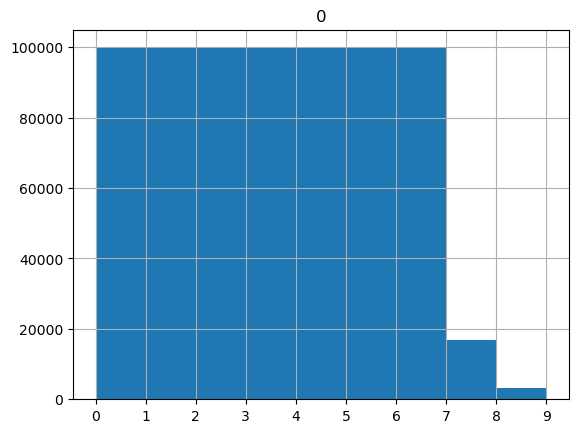

In [14]:
from matplotlib import pyplot as plt
y_df.hist(bins = range(0, 10))
plt.xticks(range(0, 10))
plt.show()